# ECSE 415 Intro to Computer Vision

Assignment 4

Author: Mustafa Javed

Images provided by Prof James J. Clark

Credit: Part of code has been taken from ECSE 415 Tutorials and Assignment.

In [1]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import cv2

#mount drive
from google.colab import drive
drive.mount('/content/drive')

#define dataset path. Edit this path according to the folder where dataset flower_subset is stored
path = '/content/drive/My Drive/ECSE 415/Assignment 4/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# define a method to calculate Kmeans
# Z = image , K = number of clusters, N = number of iternation

def Kmeans(Z, K, N):
  
  img_v = Z.copy()
  
  #select random K values
  np.random.shuffle(img_v)
  centers =  img_v[:K]
  
  # Label points according to random centers
  labels = np.argmin(np.sum((Z[None,:,:] - centers[:,None,:])**2, -1),0)
  
  #make cluster based on random centers
  clusters = []
  for i in range(0,K):
   clusters.append(Z[labels==i])
   
  # store center and label for each iteration
  total_centers = []
  total_labels = [] 
  
  # Moving the center to cluster mean for N interation
  for i in range(0,N):
    
    # Take mean of each clutster and make it the center
    centers = []
    for i in range(0,K):
      centers.append( np.mean(clusters[i],0) )      
    centers = np.array(centers)
    total_centers.append(centers)

    # make clusters based on new centers
    labels = np.argmin(np.sum((Z[None,:,:] - centers[:,None,:])**2, -1),0)
    total_labels.append(labels)

    for j in range(0,K):
      clusters[j] =  Z[labels==j] 
     
  
  return centers,labels, total_centers, total_labels






K = 2


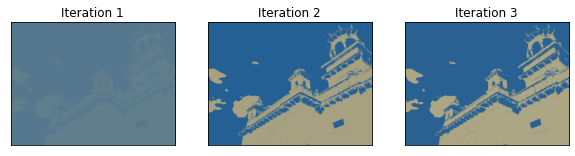

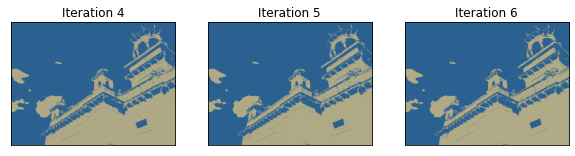

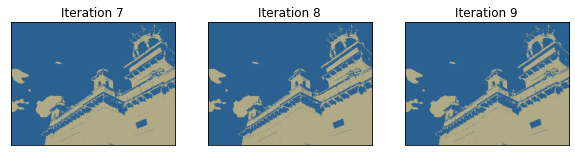

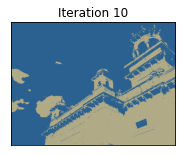

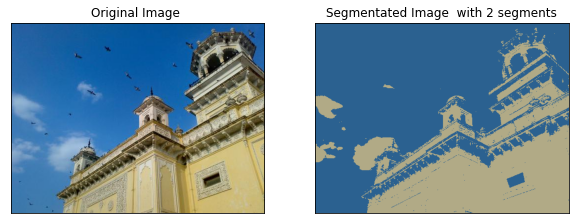

K=3


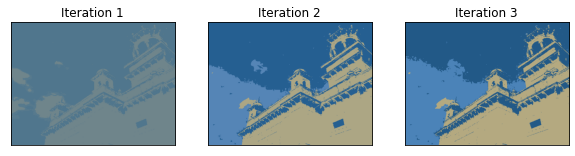

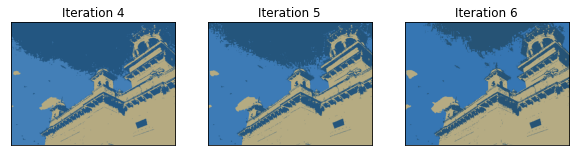

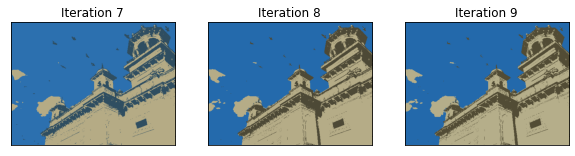

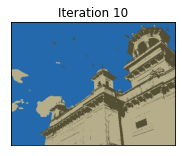

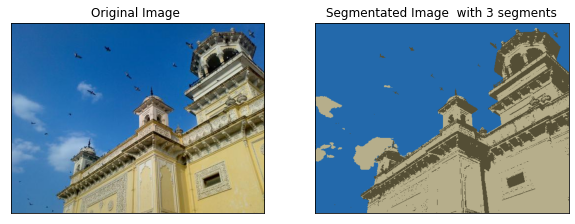

In [3]:
#load images
home = cv2.imread(path + 'home.jpg')
# convert to RGB
home = cv2.cvtColor(home, cv2.COLOR_BGR2RGB)
#convert into a vector with 3 channels
home_vector = home.reshape(-1,3)


#segment image in 2 segments with 10 iterations
final_center, final_labels ,total_centers, total_labels = Kmeans(home_vector,2,10)

#print all interations
print("K = 2")
for i in range(len(total_centers)):
  if(i%3 ==0):
    plt.figure(figsize=(10,10))
  center = np.uint8(total_centers[i])
  out = center[total_labels[i].flatten()]
  out = out.reshape((home.shape))
  plt.subplot(130 + ((i%3)+1)), plt.imshow(out)
  plt.title('Iteration ' + str(i+1)), plt.xticks([]), plt.yticks([])   
plt.show()

#print final result
center = np.uint8(final_center)
out = center[final_labels.flatten()]
out = out.reshape((home.shape))

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(home)
plt.title("Original Image "), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(out)
plt.title("Segmentated Image  with 2 segments"), plt.xticks([]), plt.yticks([])
plt.show()


## segmention with 3 centers
final_center, final_labels, total_centers, total_labels = Kmeans(home_vector,3,10)

print("K=3")
for i in range(len(total_centers)):
  if(i%3 ==0):
    plt.figure(figsize=(10,10))
  center = np.uint8(total_centers[i])
  out = center[total_labels[i].flatten()]
  out = out.reshape((home.shape))
  plt.subplot(130 + ((i%3)+1)), plt.imshow(out)
  plt.title('Iteration ' + str(i+1)), plt.xticks([]), plt.yticks([])   
plt.show()

# Now convert back into uint8, and make original image
center = np.uint8(final_center)
out = center[final_labels.flatten()]
out = out.reshape((home.shape))

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(home)
plt.title("Original Image "), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(out)
plt.title("Segmentated Image  with 3 segments"), plt.xticks([]), plt.yticks([])
plt.show()

K = 2


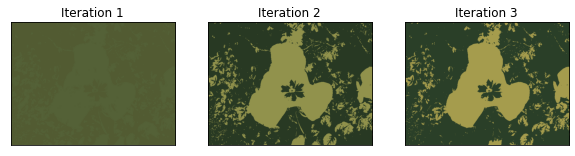

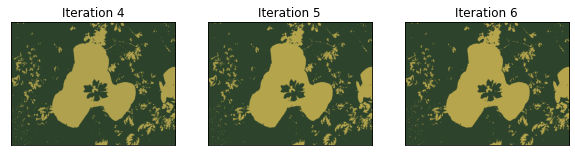

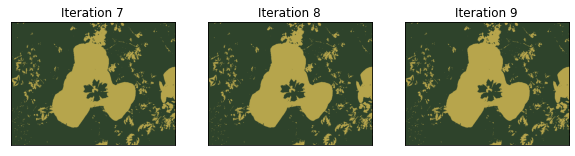

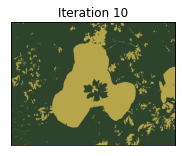

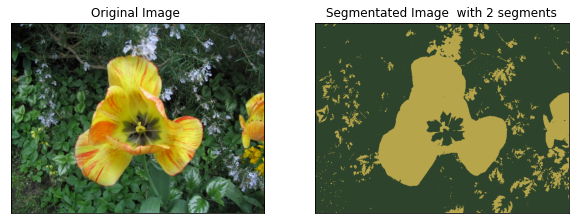

K=3


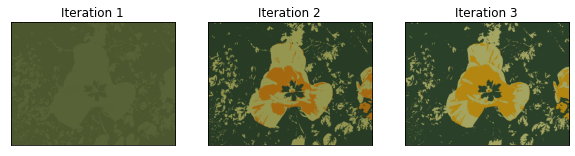

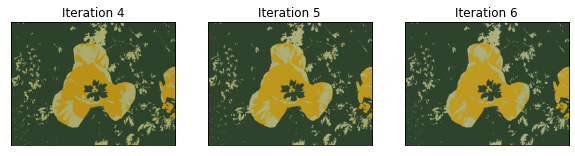

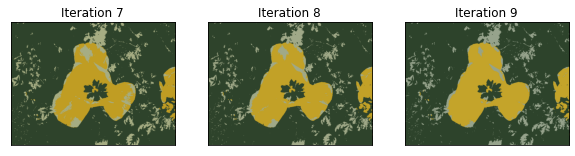

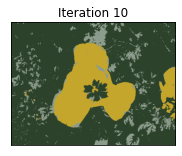

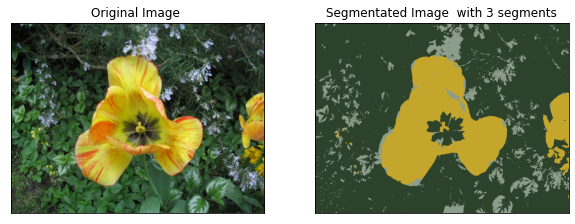

In [4]:
flower = cv2.imread(path + 'flower.jpg')
# convert to RGB
flower = cv2.cvtColor(flower, cv2.COLOR_BGR2RGB)
#convert into a vector with 3 channels
flower_vector = flower.reshape(-1,3)

#segment image in 2 segments with 10 iterations
final_center, final_labels, total_centers, total_labels = Kmeans(flower_vector,2,10)

#print all interations
print("K = 2")
for i in range(len(total_centers)):
  if(i%3 ==0):
    plt.figure(figsize=(10,10))
  center = np.uint8(total_centers[i])
  out = center[total_labels[i].flatten()]
  out = out.reshape((flower.shape))
  plt.subplot(130 + ((i%3)+1)), plt.imshow(out)
  plt.title('Iteration ' + str(i+1)), plt.xticks([]), plt.yticks([])   
plt.show()

#print final result
# Now convert back into uint8, and make original image
center = np.uint8(final_center)
out = center[final_labels.flatten()]
out = out.reshape((flower.shape))

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(flower)
plt.title("Original Image "), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(out)
plt.title("Segmentated Image  with 2 segments"), plt.xticks([]), plt.yticks([])
plt.show()

#segment image in 3 segments with 10 iterations
final_center, final_labels, total_centers, total_labels = Kmeans(flower_vector,3,10)

print("K=3")
for i in range(len(total_centers)):
  if(i%3 ==0):
    plt.figure(figsize=(10,10))
  center = np.uint8(total_centers[i])
  out = center[total_labels[i].flatten()]
  out = out.reshape((flower.shape))
  plt.subplot(130 + ((i%3)+1)), plt.imshow(out)
  plt.title('Iteration ' + str(i+1)), plt.xticks([]), plt.yticks([])   
plt.show()

# Now convert back into uint8, and make original image
center = np.uint8(final_center)
out = center[final_labels.flatten()]
out = out.reshape((flower.shape))

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(flower)
plt.title("Original Image "), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(out)
plt.title("Segmentated Image  with 3 segments"), plt.xticks([]), plt.yticks([])
plt.show()

2 Disparity

In [7]:
def disparityMap(image1,image2,winSize, DispSize):
  disparity = np.zeros_like(image1, np.uint8)
  
  # Loop a window over image
  for y in range(0, image1.shape[0]):  
    for x in range(0, image1.shape[1]): 
      window = image1[(y - winSize//2):(y + ( (winSize//2)+1)), (x - winSize//2):(x + ( (winSize//2)+1))]
    
     # check if window shape is correct. At corners, window can contain empty pixels. 
      if window.shape[0] != winSize or window.shape[1] != winSize:
        disparity[y,x] = 48
        continue
     
     #Make a second window and compute minimun SSD
      min = float('inf')
      for j in range(-DispSize +1  , 1):
        window2 = image2[(y - winSize//2) : (y + (winSize//2)+1)  , ( x + j - winSize//2) : x + j + ( (winSize//2)+1)  ]
        
         # check if window shape is correct. At corners, window can contain empty pixels
        if window2.shape[0] != winSize or window2.shape[1] != winSize:
          disparity[y,x] = 48
          break
        else:
          SSD = np.sum( np.sqrt( (window2 - window)**2 ) )
          if SSD < min:
            min = SSD
            disparity[y,x] = -j

  return disparity


(Text(0.5, 1.0, 'Disparity Map'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

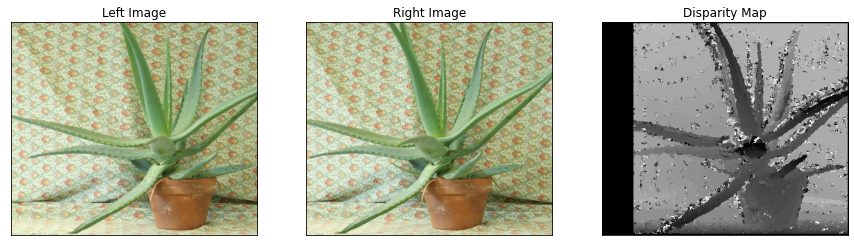

In [8]:
#Load images
imgL = cv2.imread(path + 'aloeL.jpg')
imgR = cv2.imread(path + 'aloeR.jpg')

# resize images for fast processing
imgL = cv2.resize(imgL, None, fx=0.3, fy=0.3)
imgR = cv2.resize(imgR, None, fx=0.3, fy=0.3)

# convert to RGB
imgL_gray = cv2.cvtColor(imgL, cv2.COLOR_BGR2GRAY)
imgR_gray = cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY)

disparity = disparityMap(imgL_gray, imgR_gray , 5, 48)
#print(disparity[150,:])

# display images
plt.figure(figsize=(15,15))
plt.subplot(131), plt.imshow(cv2.cvtColor(imgL, cv2.COLOR_BGR2RGB))
plt.title("Left Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(cv2.cvtColor(imgR, cv2.COLOR_BGR2RGB))
plt.title("Right Image"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(disparity, cmap="gray_r")
plt.title("Disparity Map"), plt.xticks([]), plt.yticks([])

##3 Optical Flow


5 1.0977172630526093
7 0.8169352237264985
9 0.7038979823868026
11 0.6374048517006686
13 0.5983505025565776
15 0.5741760542260537
17 0.5566125141975289
19 0.5414743384267005
21 0.5282096903777942


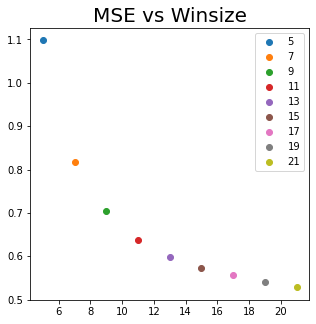

In [10]:
# load images and ground truth
img1 = cv2.imread(path + 'frame10.png')
img1_gray =  cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

img2 = cv2.imread(path + 'frame11.png')
img2_gray =  cv2.cvtColor( img2, cv2.COLOR_BGR2GRAY)

gt = np.load(path + 'flow10.npz')['flow']

windowSize = range(5,23,2)
MSE_per_winSize = np.zeros(50)

# Compute optical flow using the Gunner Farneback's algorithm

for i in windowSize :
  flow = cv2.calcOpticalFlowFarneback(prev=img1_gray, 
                                    next=img2_gray, 
                                    flow=None,
                                    pyr_scale=0.5, 
                                    levels=3, 
                                    winsize= i,
                                    iterations=3, 
                                    poly_n=5, 
                                    poly_sigma=1.2, 
                                    flags=0)

 #measure mean squared error(MSE) between estimated optical flow and the ground truth optical flow

  MSE_per_winSize[i] = ( np.mean( (gt - flow)**2 ))

  print(i,MSE_per_winSize[i])

plt.figure(figsize=(5,5))

plt.title("MSE vs Winsize", fontsize=20)
for w in windowSize:
  plt.scatter(w,MSE_per_winSize[w], label = f"{w}")
plt.legend()
plt.show()

Do you observe any trend in the plot above? Does the error increase or decrease with increasing window-size? Explain the effect of window-size on the prediction error.

The window size and error are inversely related. The error decreases with an increasing window size. Larger window size values increase the algorithm robustness to image noise but yield more blurred motion field. Smaller window sizes can lead to a false positive match another part of the image and assume motion. As the window size increases, the possibility of false positive decreases. The larger window also provides smoothing against noise.